In [59]:
#pip install seaborn

In [60]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [61]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSUSERSL123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSUSERSL123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSUSERSL123\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
#loading the dataset
news_df = pd.read_csv('uci-news-aggregator.csv')
news_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [63]:
#checking the shape of the dataset
news_df.shape


(422419, 8)

In [64]:
#checking the columns of the dataset
news_df.columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')

In [65]:
#checking the info of the dataset
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         422419 non-null  int64 
 1   TITLE      422419 non-null  object
 2   URL        422419 non-null  object
 3   PUBLISHER  422417 non-null  object
 4   CATEGORY   422419 non-null  object
 5   STORY      422419 non-null  object
 6   HOSTNAME   422419 non-null  object
 7   TIMESTAMP  422419 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [66]:
#checking the null values in the dataset
news_df.isnull().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    2
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [67]:
#checking the unique values in the dataset
news_df.nunique()

ID           422419
TITLE        406455
URL          422223
PUBLISHER     10985
CATEGORY          4
STORY          7230
HOSTNAME      11236
TIMESTAMP    422419
dtype: int64

In [68]:
#handling null
news_df['PUBLISHER'] = news_df['PUBLISHER'].fillna(news_df['PUBLISHER'].mode()[0])

#checking the null values in the dataset
news_df.isnull().sum()


ID           0
TITLE        0
URL          0
PUBLISHER    0
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [69]:
#timestamp to dates
news_df['TIMESTAMP'] = pd.to_datetime(news_df['TIMESTAMP'], unit='ms')
#GET DATE IN YYYY-MM(WORDS)-DD FORMAT
news_df['TIMESTAMP'] = news_df['TIMESTAMP'].apply(lambda x: x.strftime('%Y-%B-%d'))
news_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-March-10
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-March-10
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-March-10
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-March-10
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-March-10


In [70]:
#more informative category names
category_names = {"b": "business",
      "t" : "science and technology",
      "e" : "entertainment",
      "m" : "health"}
news_df['CATEGORY'] = news_df['CATEGORY'].map(category_names)
news_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-March-10
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-March-10
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-March-10
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-March-10
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-March-10


In [71]:
#check for duplicated rows
news_df.duplicated().sum()

#drop duplicates
if news_df.duplicated().sum() > 0:
    news_df.drop_duplicates(inplace=True)
else:
    print('No duplicates found')

No duplicates found


In [72]:
news_df.shape

(422419, 8)

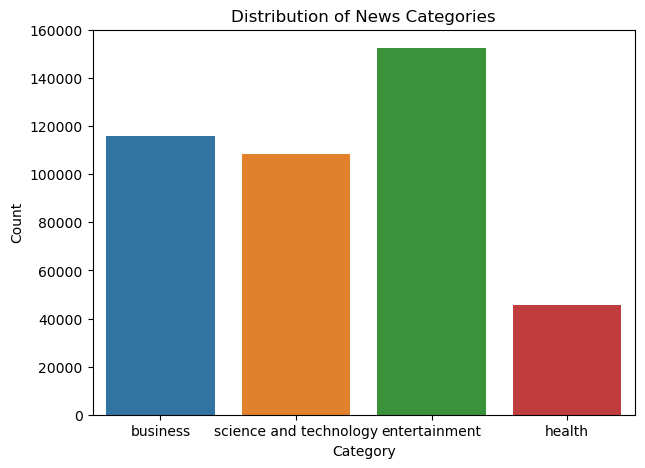

In [73]:
#Bar Plot of Category Distribution:
plt.figure(figsize=(7, 5))
sns.countplot(x="CATEGORY", data=news_df)
plt.title("Distribution of News Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

#### Observation:
Bar Plot of Category Distribution:
The distribution of news categories shows that the dataset contains a balanced representation of business, science and technology, entertainment, and health news articles.
Business and entertainment categories have a slightly higher count compared to science and technology and health categories.

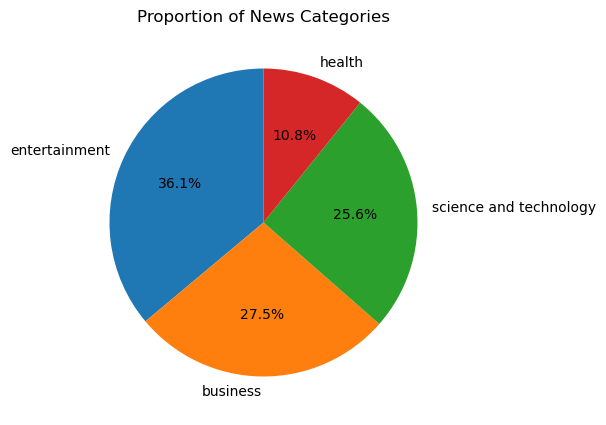

In [74]:
#Pie Chart of Category Proportions
category_counts = news_df["CATEGORY"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of News Categories")
plt.show()

#### Observation:
Pie Chart of Category Proportions:
The pie chart illustrates the proportion of each news category in the dataset.
Business and entertainment categories have a relatively larger share, while science and technology and health categories have a smaller share.

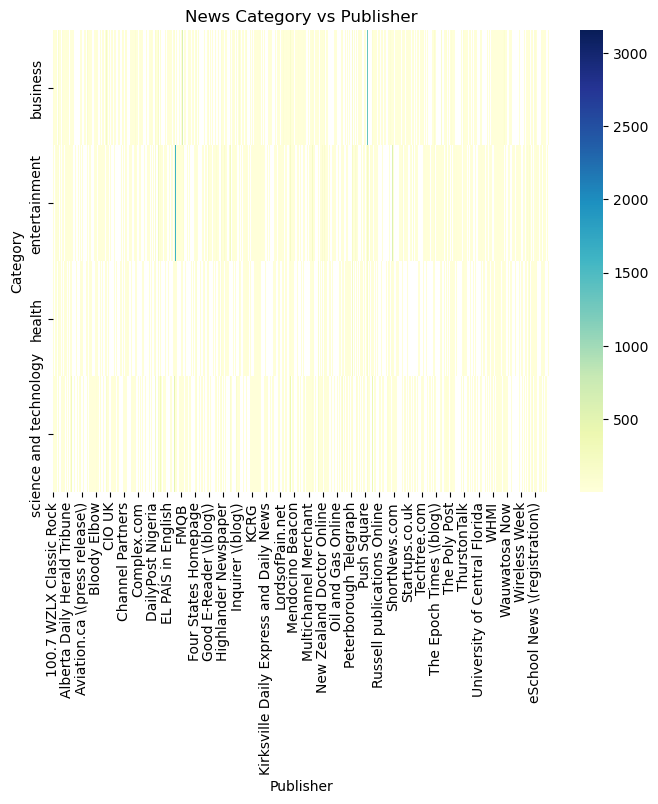

In [75]:
#Heatmap of Category vs. Publisher:
category_publisher = news_df.groupby(["CATEGORY", "PUBLISHER"]).size().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(category_publisher, cmap="YlGnBu")
plt.title("News Category vs Publisher")
plt.xlabel("Publisher")
plt.ylabel("Category")
plt.show()

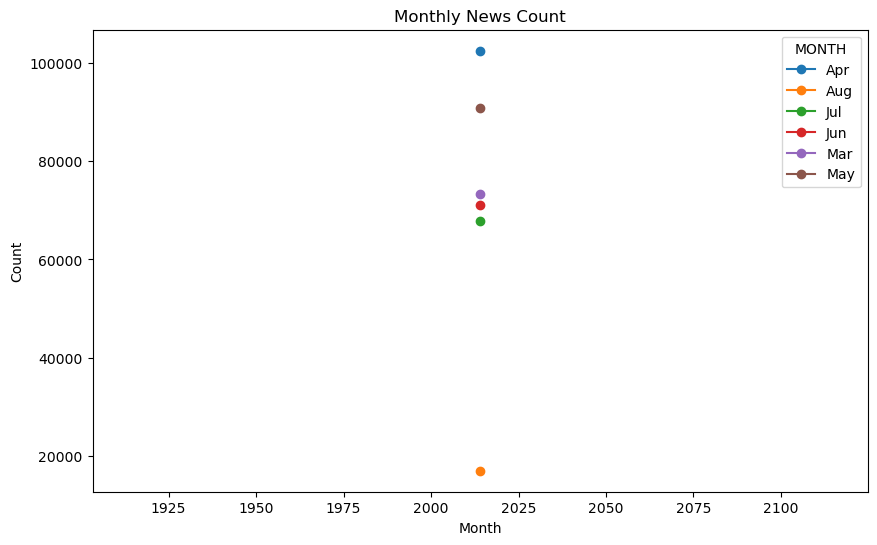

In [76]:
#Line Plot of Monthly News Count
import calendar

news_df['TIMESTAMP'] = pd.to_datetime(news_df['TIMESTAMP'])
news_df['MONTH'] = news_df['TIMESTAMP'].dt.month
news_df['YEAR'] = news_df['TIMESTAMP'].dt.year
news_df['MONTH'] = news_df['MONTH'].apply(lambda x: calendar.month_abbr[x])

monthly_news = news_df.groupby(["YEAR", "MONTH"]).size().unstack()
monthly_news.plot(kind="line", figsize=(10, 6), marker="o")
plt.title("Monthly News Count")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [77]:
news_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,MONTH,YEAR
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-03-10,Mar,2014
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-03-10,Mar,2014
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10,Mar,2014
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10,Mar,2014
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-03-10,Mar,2014


In [78]:
#PANDAS ANALYTISCS OF NEWS_DF
news_df.describe()

,ID,YEAR
count,422419.000000,422419.0
mean,211536.764594,2014.0
std,122102.839707,0.0
min,1.000000,2014.0
25%,105801.500000,2014.0
50%,211655.000000,2014.0
75%,317273.500000,2014.0
max,422937.000000,2014.0


In [79]:
#GROUPBY ANALYTICS OF NEWS_DF
news_df.groupby('CATEGORY').describe()

ID                                        \
                           count           mean            std     min   
CATEGORY                                                                 
business                115967.0  210544.533911  122425.665139     1.0   
entertainment           152469.0  211261.873692  121905.693181  2170.0   
health                   45639.0  216210.545520  124515.779549  4208.0   
science and technology  108344.0  211016.861958  120960.405488   945.0   

                                                                      YEAR  \
                              25%       50%        75%       max     count   
CATEGORY                                                                     
business                101845.50  211931.0  311176.50  418875.0  115967.0   
entertainment           108956.00  210088.0  320453.00  422235.0  152469.0   
health                  100603.50  219209.0  326432.50  422937.0   45639.0   
science and technology  106123.75  213505.5  315876.25  420154.0  108344.0   

                                                                             
                          mean  std     min     25%     50%     75%     max  
CATEGORY                                                                     
business                2014.0  0.0  2014.0  2014.0  2014.0  2014.0  2014.0  
entertainment           2014.0  0.0  2014.0  2014.0  2014.0  2014.0  2014.0  
health                  2014.0  0.0  2014.0  2014.0  2014.0  2014.0  2014.0  
science and technology  2014.0  0.0  2014.0  2014.0  2014.0  2014.0  2014.0

In [80]:
#which year have maximum news
news_df.nunique()

ID           422419
TITLE        406455
URL          422223
PUBLISHER     10985
CATEGORY          4
STORY          7230
HOSTNAME      11236
TIMESTAMP       105
MONTH             6
YEAR              1
dtype: int64

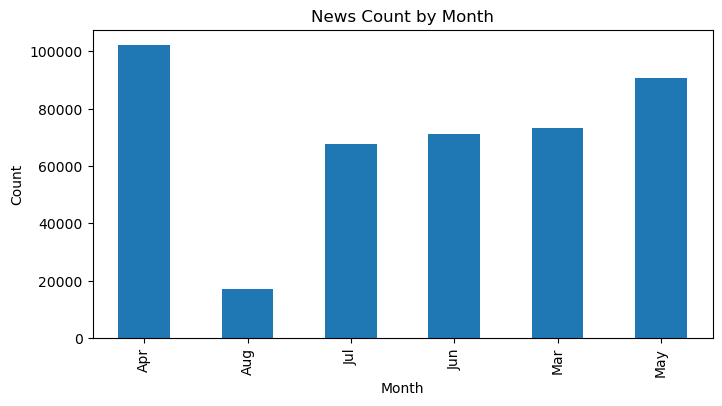

In [81]:
#Bar Plot of News Count by Month
monthly_news.sum().plot(kind="bar", figsize=(8, 4))
plt.title("News Count by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

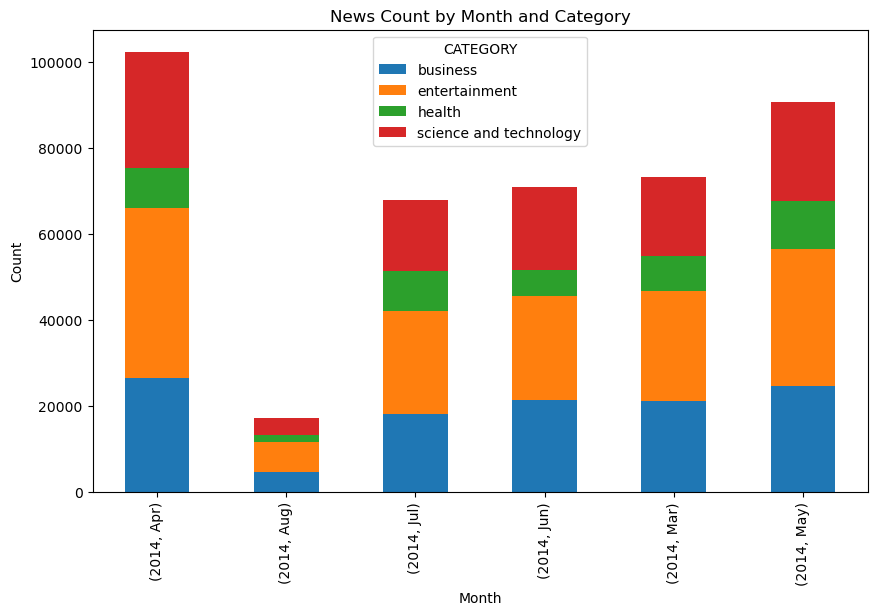

In [82]:
#Stacked Bar Plot of News Count by Month and Category
monthly_category = news_df.groupby(["YEAR", "MONTH", "CATEGORY"]).size().unstack()
monthly_category.plot(kind="bar", figsize=(10, 6), stacked=True)
plt.title("News Count by Month and Category")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


In [83]:
pip install wordcloud

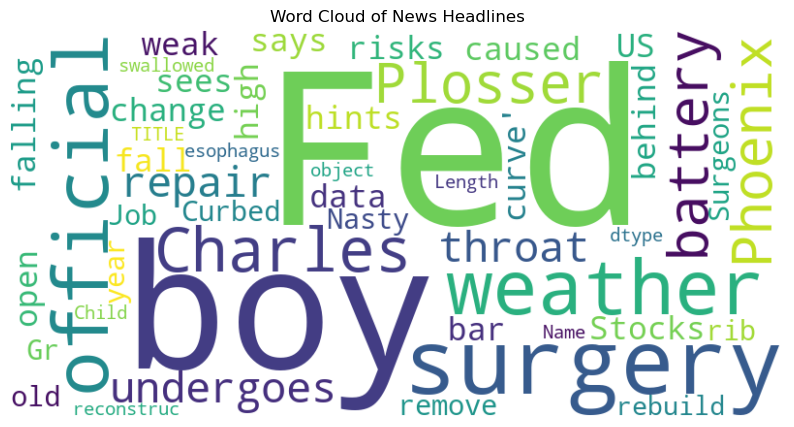

In [84]:
#Word Cloud of News Headlines
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(10, 10))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white", stopwords=stopwords, max_words=100, width=800, height=400).generate(
    str(news_df["TITLE"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of News Headlines")
plt.show()

### classify the news into categories based on the headlines

In [85]:
news_df_df = news_df.copy()
#- Dropping features [ID,URL,PUBLISHER,STORY,HOSTNAME,TIMESTAMP]¶
news_df_df.drop(['ID', 'URL', 'PUBLISHER', 'STORY', 'HOSTNAME', 'TIMESTAMP','MONTH','YEAR'], axis=1, inplace=True)
news_df_df.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",business
1,Fed's Charles Plosser sees high bar for change...,business
2,US open: Stocks fall after Fed official hints ...,business
3,"Fed risks falling 'behind the curve', Charles ...",business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business


In [86]:
#title normal case
news_df_df['TITLE'] = news_df_df['TITLE'].apply(lambda x: x.lower())
news_df_df.head()


,TITLE,CATEGORY
0,"fed official says weak data caused by weather,...",business
1,fed's charles plosser sees high bar for change...,business
2,us open: stocks fall after fed official hints ...,business
3,"fed risks falling 'behind the curve', charles ...",business
4,fed's plosser: nasty weather has curbed job gr...,business


In [87]:
#cleaning data set tqdm
from tqdm import tqdm
import string
import nltk
from nltk.corpus import stopwords
'''
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords.words('english')]
    return text

news_df_df['TITLE_CLEANED'] = news_df_df['TITLE'].apply(lambda x: clean_text(x))
news_df_df.head()
'''
tqdm.pandas()
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
news_df_df["Punc_title"] = news_df_df["TITLE"].progress_apply(lambda text: remove_punctuation(text))



STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
news_df_df["TITLE_CLEANED"] = news_df_df["Punc_title"].progress_apply(lambda text: remove_stopwords(text))


  0%|          | 0/422419 [00:00<?, ?it/s]

100%|██████████| 422419/422419 [00:02<00:00, 188256.71it/s]


In [88]:
news_df_df.head()

,TITLE,CATEGORY,Punc_title,TITLE_CLEANED
0,"fed official says weak data caused by weather,...",business,fed official says weak data caused by weather ...,fed official says weak data caused weather slo...
1,fed's charles plosser sees high bar for change...,business,feds charles plosser sees high bar for change ...,feds charles plosser sees high bar change pace...
2,us open: stocks fall after fed official hints ...,business,us open stocks fall after fed official hints a...,us open stocks fall fed official hints acceler...
3,"fed risks falling 'behind the curve', charles ...",business,fed risks falling behind the curve charles plo...,fed risks falling behind curve charles plosser...
4,fed's plosser: nasty weather has curbed job gr...,business,feds plosser nasty weather has curbed job growth,feds plosser nasty weather curbed job growth


In [92]:
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MSUSERSL123\AppData\Roaming\nltk_data...


True

In [93]:
# Lemmatizing (since Stemming may create non-existent/incorrect words)
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

tqdm.pandas()  # Enable tqdm progress bar

news_df_df['TITLE_LEMMATIZED'] = news_df_df['TITLE_CLEANED'].progress_apply(lambda x: lemmatizing(x))
news_df_df.head()


100%|██████████| 422419/422419 [02:33<00:00, 2746.59it/s]


,TITLE,CATEGORY,Punc_title,TITLE_CLEANED,TITLE_LEMMATIZED
0,"fed official says weak data caused by weather,...",business,fed official says weak data caused by weather ...,fed official says weak data caused weather slo...,"[f, e, d, , o, f, f, i, c, i, a, l, , s, a, ..."
1,fed's charles plosser sees high bar for change...,business,feds charles plosser sees high bar for change ...,feds charles plosser sees high bar change pace...,"[f, e, d, s, , c, h, a, r, l, e, s, , p, l, ..."
2,us open: stocks fall after fed official hints ...,business,us open stocks fall after fed official hints a...,us open stocks fall fed official hints acceler...,"[u, s, , o, p, e, n, , s, t, o, c, k, s, , ..."
3,"fed risks falling 'behind the curve', charles ...",business,fed risks falling behind the curve charles plo...,fed risks falling behind curve charles plosser...,"[f, e, d, , r, i, s, k, s, , f, a, l, l, i, ..."
4,fed's plosser: nasty weather has curbed job gr...,business,feds plosser nasty weather has curbed job growth,feds plosser nasty weather curbed job growth,"[f, e, d, s, , p, l, o, s, s, e, r, , n, a, ..."


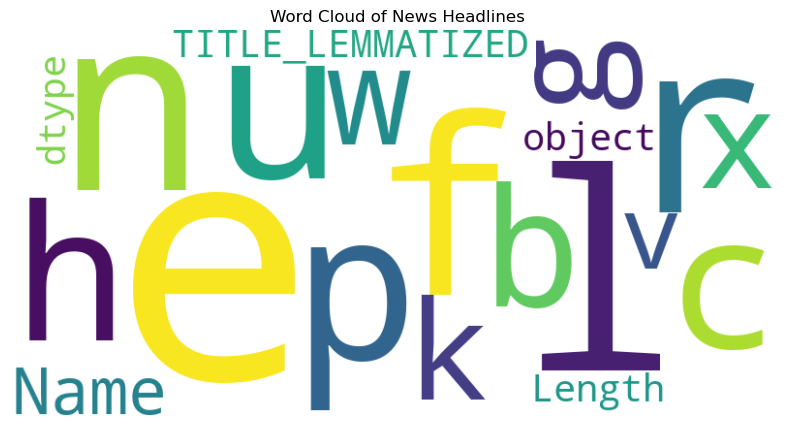

In [94]:
#word cloud
plt.figure(figsize=(10, 10))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white", stopwords=stopwords, max_words=100, width=800, height=400).generate(
    str(news_df_df["TITLE_LEMMATIZED"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of News Headlines")
plt.show()


In [95]:
#standaradizing the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
news_df_df['CATEGORY'] = le.fit_transform(news_df_df['CATEGORY'])
news_df_df.head()

,TITLE,CATEGORY,Punc_title,TITLE_CLEANED,TITLE_LEMMATIZED
0,"fed official says weak data caused by weather,...",0,fed official says weak data caused by weather ...,fed official says weak data caused weather slo...,"[f, e, d, , o, f, f, i, c, i, a, l, , s, a, ..."
1,fed's charles plosser sees high bar for change...,0,feds charles plosser sees high bar for change ...,feds charles plosser sees high bar change pace...,"[f, e, d, s, , c, h, a, r, l, e, s, , p, l, ..."
2,us open: stocks fall after fed official hints ...,0,us open stocks fall after fed official hints a...,us open stocks fall fed official hints acceler...,"[u, s, , o, p, e, n, , s, t, o, c, k, s, , ..."
3,"fed risks falling 'behind the curve', charles ...",0,fed risks falling behind the curve charles plo...,fed risks falling behind curve charles plosser...,"[f, e, d, , r, i, s, k, s, , f, a, l, l, i, ..."
4,fed's plosser: nasty weather has curbed job gr...,0,feds plosser nasty weather has curbed job growth,feds plosser nasty weather curbed job growth,"[f, e, d, s, , p, l, o, s, s, e, r, , n, a, ..."


In [1]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2971 sha256=7fcb709b2c6a1d5876ea7d48a584906b24f12466bc6349316904f8b489ee10c3
  Stored in directory: c:\users\abbas\appdata\local\pip\cache\wheels\fd\9a\df\6ef61b0b488bb4af8ccbd93781a855ee6fe3787e1b6480897d
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
#TO CSV
news_df_df.to_csv('news_df_df1.csv', index=False)

NameError: name 'news_df_df' is not defined

In [1]:
#opening csv
import csv
import pandas as pd
news_cleaned = pd.read_csv('news_df_df1.csv')
news_cleaned.head()

,TITLE,CATEGORY,Punc_title,TITLE_CLEANED,TITLE_LEMMATIZED
0,"fed official says weak data caused by weather,...",0,fed official says weak data caused by weather ...,fed official says weak data caused weather slo...,"['f', 'e', 'd', ' ', 'o', 'f', 'f', 'i', 'c', ..."
1,fed's charles plosser sees high bar for change...,0,feds charles plosser sees high bar for change ...,feds charles plosser sees high bar change pace...,"['f', 'e', 'd', 's', ' ', 'c', 'h', 'a', 'r', ..."
2,us open: stocks fall after fed official hints ...,0,us open stocks fall after fed official hints a...,us open stocks fall fed official hints acceler...,"['u', 's', ' ', 'o', 'p', 'e', 'n', ' ', 's', ..."
3,"fed risks falling 'behind the curve', charles ...",0,fed risks falling behind the curve charles plo...,fed risks falling behind curve charles plosser...,"['f', 'e', 'd', ' ', 'r', 'i', 's', 'k', 's', ..."
4,fed's plosser: nasty weather has curbed job gr...,0,feds plosser nasty weather has curbed job growth,feds plosser nasty weather curbed job growth,"['f', 'e', 'd', 's', ' ', 'p', 'l', 'o', 's', ..."


In [2]:
#droping punc and lemm
news_cleaned.drop(['Punc_title', 'TITLE_LEMMATIZED'], axis=1, inplace=True)
news_cleaned.head()

,TITLE,CATEGORY,TITLE_CLEANED
0,"fed official says weak data caused by weather,...",0,fed official says weak data caused weather slo...
1,fed's charles plosser sees high bar for change...,0,feds charles plosser sees high bar change pace...
2,us open: stocks fall after fed official hints ...,0,us open stocks fall fed official hints acceler...
3,"fed risks falling 'behind the curve', charles ...",0,fed risks falling behind curve charles plosser...
4,fed's plosser: nasty weather has curbed job gr...,0,feds plosser nasty weather curbed job growth


In [3]:
#Feature Engineering vectorization
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
news_cleaned['TITLE_CLEANED'].fillna(" ", inplace=True)
X_counts = count_vect.fit_transform(news_cleaned['TITLE_CLEANED'])


In [4]:
X_counts.shape

(422419, 71746)

In [5]:
y = news_cleaned['CATEGORY']

In [6]:
y.shape

(422419,)

In [7]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(337935, 71746)
(84484, 71746)
(337935,)
(84484,)


In [8]:
model_analysis = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


In [9]:
#model building each lr,mnb,rfc,svc,dtc
#Logistic Regression with parameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
param_grid = {'C': [0.1, 1, 10, 100]}
clf_lr = GridSearchCV(lr, param_grid, cv=5)
clf_lr.fit(X_train, y_train)
print("Best Hyper Parameters:\n", clf_lr.best_params_)
print("Best Score:\n", clf_lr.best_score_)
print("Best Estimators:\n", clf_lr.best_estimator_)
print("Best Test Score:\n", clf_lr.score(X_test, y_test))

#model analysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_lr = clf_lr.predict(X_test)
model_analysis = model_analysis.append({'Model': 'Logistic Regression', 'Accuracy': accuracy_score(y_test, y_pred_lr),
                                        'Precision': precision_score(y_test, y_pred_lr, average='weighted'),
                                        'Recall': recall_score(y_test, y_pred_lr, average='weighted'),
                                        'F1-Score': f1_score(y_test, y_pred_lr, average='weighted')},
                                        ignore_index=True)
model_analysis


c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best Hyper Parameters:
 {'C': 1}
Best Score:
 0.9449065648719428
Best Estimators:
 LogisticRegression(C=1)
Best Test Score:
 0.9467591496614743


C:\Users\MSUSERSL123\AppData\Local\Temp\ipykernel_8856\3446108788.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_analysis = model_analysis.append({'Model': 'Logistic Regression', 'Accuracy': accuracy_score(y_test, y_pred_lr),


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.946759,0.946695,0.946759,0.946694


In [18]:
clf_lr.predict(count_vect.transform(["Google+ rolls out 'Stories' for tricked out photo playback"]))

array([3], dtype=int64)

In [10]:


#Naive Bayes with parameter tuning
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
param_grid = {'alpha': [0.1, 1, 10, 100]}
clf_mnb = GridSearchCV(mnb, param_grid, cv=5)
clf_mnb.fit(X_train, y_train)
print("Best Hyper Parameters:\n", clf_mnb.best_params_)
print("Best Score:\n", clf_mnb.best_score_)
print("Best Estimators:\n", clf_mnb.best_estimator_)
print("Best Test Score:\n", clf_mnb.score(X_test, y_test))

#model analysis
y_pred_mnb = clf_mnb.predict(X_test)
model_analysis = model_analysis.append({'Model': 'Multinomial Naive Bayes', 'Accuracy': accuracy_score(y_test, y_pred_mnb),
                                        'Precision': precision_score(y_test, y_pred_mnb, average='weighted'),
                                        'Recall': recall_score(y_test, y_pred_mnb, average='weighted'),
                                        'F1-Score': f1_score(y_test, y_pred_mnb, average='weighted')},
                                        ignore_index=True)

model_analysis



#bernoulli
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
param_grid = {'alpha': [0.1, 1, 10, 100]}
clf_bnb = GridSearchCV(bnb, param_grid, cv=5)
clf_bnb.fit(X_train, y_train)
print("Best Hyper Parameters:\n", clf_bnb.best_params_)
print("Best Score:\n", clf_bnb.best_score_)
print("Best Estimators:\n", clf_bnb.best_estimator_)
print("Best Test Score:\n", clf_bnb.score(X_test, y_test))

#model analysis
y_pred_bnb = clf_bnb.predict(X_test)
model_analysis = model_analysis.append({'Model': 'Bernoulli Naive Bayes', 'Accuracy': accuracy_score(y_test, y_pred_bnb),
                                        'Precision': precision_score(y_test, y_pred_bnb, average='weighted'),
                                        'Recall': recall_score(y_test, y_pred_bnb, average='weighted'),
                                        'F1-Score': f1_score(y_test, y_pred_bnb, average='weighted')},
                                        ignore_index=True)

model_analysis

Best Hyper Parameters:
 {'alpha': 0.1}
Best Score:
 0.9304096941719561
Best Estimators:
 MultinomialNB(alpha=0.1)
Best Test Score:
 0.931785900288812


C:\Users\MSUSERSL123\AppData\Local\Temp\ipykernel_8856\2908092724.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_analysis = model_analysis.append({'Model': 'Multinomial Naive Bayes', 'Accuracy': accuracy_score(y_test, y_pred_mnb),


Best Hyper Parameters:
 {'alpha': 0.1}
Best Score:
 0.9303653069377248
Best Estimators:
 BernoulliNB(alpha=0.1)
Best Test Score:
 0.9315254959518963


C:\Users\MSUSERSL123\AppData\Local\Temp\ipykernel_8856\2908092724.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_analysis = model_analysis.append({'Model': 'Bernoulli Naive Bayes', 'Accuracy': accuracy_score(y_test, y_pred_bnb),


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.946759,0.946695,0.946759,0.946694
1,Multinomial Naive Bayes,0.931786,0.931805,0.931786,0.931788
2,Bernoulli Naive Bayes,0.931525,0.931570,0.931525,0.931538


In [17]:
#Random Forest with parameter tuning
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300, 400, 500]}
clf_rfc = GridSearchCV(rfc, param_grid, cv=5)
clf_rfc.fit(X_train, y_train)
print("Best Hyper Parameters:\n", clf_rfc.best_params_)
print("Best Score:\n", clf_rfc.best_score_)
print("Best Estimators:\n", clf_rfc.best_estimator_)
print("Best Test Score:\n", clf_rfc.score(X_test, y_test))

#model analysis
y_pred_rfc = clf_rfc.predict(X_test)
model_analysis = model_analysis.append({'Model': 'Random Forest Classifier', 'Accuracy': accuracy_score(y_test, y_pred_rfc),
                                        'Precision': precision_score(y_test, y_pred_rfc, average='weighted'),
                                        'Recall': recall_score(y_test, y_pred_rfc, average='weighted'),
                                        'F1-Score': f1_score(y_test, y_pred_rfc, average='weighted')},
                                        ignore_index=True)

model_analysis

KeyboardInterrupt: 

In [10]:
#Support Vector Classifier with parameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['linear', 'sigmoid']}
clf_svc = GridSearchCV(svc, param_grid, cv=5)
clf_svc.fit(X_train, y_train)
print("Best Hyper Parameters:\n", clf_svc.best_params_)
print("Best Score:\n", clf_svc.best_score_)
print("Best Estimators:\n", clf_svc.best_estimator_)
print("Best Test Score:\n", clf_svc.score(X_test, y_test))

#model analysis
y_pred_svc = clf_svc.predict(X_test)
model_analysis = model_analysis.append({'Model': 'Support Vector Classifier', 'Accuracy': accuracy_score(y_test, y_pred_svc),
                                        'Precision': precision_score(y_test, y_pred_svc, average='weighted'),
                                        'Recall': recall_score(y_test, y_pred_svc, average='weighted'),
                                        'F1-Score': f1_score(y_test, y_pred_svc, average='weighted')},
                                        ignore_index=True)

model_analysis

In [ ]:
#Decision Tree Classifier with parameter tuning
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param_grid = {'max_depth': [10, 20, 30, 40, 50]}
clf_dtc = GridSearchCV(dtc, param_grid, cv=5)
clf_dtc.fit(X_train, y_train)
print("Best Hyper Parameters:\n", clf_dtc.best_params_)
print("Best Score:\n", clf_dtc.best_score_)
print("Best Estimators:\n", clf_dtc.best_estimator_)
print("Best Test Score:\n", clf_dtc.score(X_test, y_test))

#model analysis
y_pred_dtc = clf_dtc.predict(X_test)
model_analysis = model_analysis.append({'Model': 'Decision Tree Classifier', 'Accuracy': accuracy_score(y_test, y_pred_dtc),
                                        'Precision': precision_score(y_test, y_pred_dtc, average='weighted'),
                                        'Recall': recall_score(y_test, y_pred_dtc, average='weighted'),
                                        'F1-Score': f1_score(y_test, y_pred_dtc, average='weighted')},
                                        ignore_index=True)

model_analysis


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid for each model
param_grid_lr = {'C': [0.1, 1, 10]}
#param_grid_rf = {'n_estimators': [100, 200, 300]}
param_grid_dt = {'max_depth': [None, 5, 10]}
param_grid_nb = {'alpha': [0.1, 1, 10]}

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(), param_grid_lr),
    #('Random Forest', RandomForestClassifier(), param_grid_rf),
    ('Decision Tree', DecisionTreeClassifier(), param_grid_dt),
    ('Naive Bayes', MultinomialNB(), param_grid_nb)
]

# Initialize result table
results = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Score'])

# Iterate over the models
for model_name, model, param_grid in models:
    print(f"Model: {model_name}")
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Print the best parameters and score
    print("Best Parameters:", best_params)
    print("Best Score:", best_score)
    print()
    
    # Append results to the table
    results = results.append({'Model': model_name, 'Best Parameters': best_params, 'Best Score': best_score}, ignore_index=True)

# Display the result table
print("Result Table:")
print(results)

Model: Logistic Regression


c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best Parameters: {'C': 1}
Best Score: 0.9449065648719428

Model: Decision Tree


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Perform TF-IDF vectorization
x = tfidf_vectorizer.fit_transform(news_cleaned['TITLE_CLEANED'])
y = news_cleaned['CATEGORY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

# Define models
lr = LogisticRegression()
rf = RandomForestClassifier()
mnb = MultinomialNB()
dt = DecisionTreeClassifier()
 
# Define pipeline with TF-IDF vectorizer and model
lr_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', lr)])
rf_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', rf)])
mnb_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', mnb)])
dt_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', dt)])

# Define parameter grids for hyperparameter tuning
lr_param_grid = {'clf__C': [0.1, 1, 10]}
rf_param_grid = {'clf__n_estimators': [100, 200, 300]}
mnb_param_grid = {'clf__alpha': [0.5, 1.0]}
dt_param_grid = {'clf__max_depth': [None, 10, 20]}

# Define list of pipelines and parameter grids
pipelines = [lr_pipeline, rf_pipeline, mnb_pipeline, dt_pipeline]
param_grids = [lr_param_grid, rf_param_grid, mnb_param_grid, dt_param_grid]
model_names = ['Logistic Regression', 'Random Forest', 'Multinomial Naive Bayes','Decision Tree']

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Accuracy'])

# Perform cross-validation and hyperparameter tuning for each model
for i, pipeline in enumerate(pipelines):
    model_name = model_names[i]
    param_grid = param_grids[i]
    
    print(f"Performing cross-validation and hyperparameter tuning for {model_name}...")
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    print("Best parameters found:")
    print(grid_search.best_params_)
    
    # Evaluate the model on the testing set
    y_pred = grid_search.predict(X_test)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    accuracy = classification_rep['accuracy']
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------")
    
    # Add results to DataFrame
    results_df = results_df.append({'Model': model_name, 'Best Parameters': grid_search.best_params_, 'Accuracy': accuracy}, ignore_index=True)

# Display the results table
print("Results:")
print(results_df)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Perform TF-IDF vectorization
x = tfidf_vectorizer.fit_transform(news_cleaned['TITLE_CLEANED'])
y = news_cleaned['CATEGORY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

# Define models
lr = LogisticRegression()
mnb = MultinomialNB()
ber = BernoulliNB() 
# Define pipeline with TF-IDF vectorizer and model
lr_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', lr)])
mnb_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', mnb)])
bert_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', ber)])


# Define parameter grids for hyperparameter tuning
lr_param_grid = {'clf__C': [0.1, 1, 10]}
mnb_param_grid = {'clf__alpha': [0.5, 1.0]}
bert_param_grid = {'clf__alpha': [0.5, 1.0]}

# Define list of pipelines and parameter grids
pipelines = [lr_pipeline, mnb_pipeline, bert_pipeline]
param_grids = [lr_param_grid,mnb_param_grid, bert_param_grid]
model_names = ['Logistic Regression','Multinomial Naive Bayes','Bernoulli Naive Bayes']

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Accuracy'])

# Perform cross-validation and hyperparameter tuning for each model
for i, pipeline in enumerate(pipelines):
    model_name = model_names[i]
    param_grid = param_grids[i]
    
    print(f"Performing cross-validation and hyperparameter tuning for {model_name}...")
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    print("Best parameters found:")
    print(grid_search.best_params_)
    
    # Evaluate the model on the testing set
    y_pred = grid_search.predict(X_test)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    accuracy = classification_rep['accuracy']
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------")
    
    # Add results to DataFrame
    results_df = results_df.append({'Model': model_name, 'Best Parameters': grid_search.best_params_, 'Accuracy': accuracy}, ignore_index=True)

# Display the results table
print("Results:")
print(results_df)

(337935, 71746)
(84484, 71746)
Performing cross-validation and hyperparameter tuning for Logistic Regression...


ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 2133, in fit_transform
    X = super().fit_transform(raw_documents)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 1275, in _count_vocab
    for feature in analyze(doc):
                   ^^^^^^^^^^^^
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 111, in _analyze
    doc = preprocessor(doc)
          ^^^^^^^^^^^^^^^^^
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 69, in _preprocess
    doc = doc.lower()
          ^^^^^^^^^
  File "c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\scipy\sparse\_base.py", line 771, in __getattr__
    raise AttributeError(attr + " not found")
AttributeError: lower not found


In [13]:
pip install tensorflow


                                              0.0/276.6 MB ? eta -:--:--
                                             0.5/276.6 MB 16.5 MB/s eta 0:00:17
                                             1.0/276.6 MB 12.7 MB/s eta 0:00:22
                                             1.6/276.6 MB 11.6 MB/s eta 0:00:24
                                             2.0/276.6 MB 11.8 MB/s eta 0:00:24
                                             2.5/276.6 MB 10.7 MB/s eta 0:00:26
                                              2.8/276.6 MB 9.9 MB/s eta 0:00:28
                                              3.0/276.6 MB 9.1 MB/s eta 0:00:31
                                              3.4/276.6 MB 9.1 MB/s eta 0:00:31
                                              4.0/276.6 MB 9.4 MB/s eta 0:00:30
                                              4.4/276.6 MB 9.3 MB/s eta 0:00:30
                                              4.7/276.6 MB 9.3 MB/s eta 0:00:30
                                              

In [14]:
pip install keras

In [19]:
#LSTM
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

# Preprocessing
labels = to_categorical(news_cleaned['CATEGORY'], num_classes=4)

n_most_common_words = 10000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(news_cleaned["TITLE"].values)
sequences = tokenizer.texts_to_sequences(news_cleaned["TITLE"].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42, stratify=news_cleaned.CATEGORY)

# Model Architecture
epochs = 3
emb_dim = 150
batch_size = 256
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.15, recurrent_dropout=0.15))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

# Training
filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=callbacks_list)

Found 75583 unique tokens.
((337935, 130), (337935, 4), (84484, 130), (84484, 4))
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 130, 150)          1500000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 130, 150)          0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 100)               100400    
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 1600804 (6.11 MB)
Trainable params: 1600804 (6.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\MSUSERSL123\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1321/1321 [==============================] - 3655s 3s/step - loss: 0.2762 - acc: 0.8994 - val_loss: 0.1831 - val_acc: 0.9354
Epoch 2/3
1321/1321 [==============================] - ETA: 0s - loss: 0.1684 - acc: 0.9403
Epoch 2: val_acc improved from 0.93540 to 0.93756, saving model to weights.best.hdf5
1321/1321 [==============================] - 2117s 2s/step - loss: 0.1684 - acc: 0.9403 - val_loss: 0.1765 - val_acc: 0.9376
Epoch 3/3
1321/1321 [==============================] - ETA: 0s - loss: 0.1506 - acc: 0.9455
Epoch 3: val_acc improved from 0.93756 to 0.93876, saving model to weights.best.hdf5
1321/1321 [==============================] - 2116s 2s/step - loss: 0.1506 - acc: 0.9455 - val_loss: 0.1739 - val_acc: 0.9388


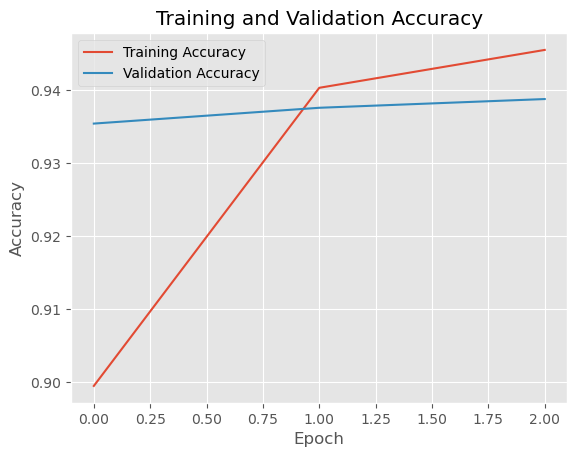

In [21]:
#model_acc
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure()
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np

# Load the dataset
news_cleaned = pd.read_csv('uci-news-aggregator.csv')

# Function to get the news link
def get_news_link(heading):
    news_link = news_cleaned[news_cleaned['TITLE'] == heading]['URL']
    return news_link

# Function to predict the category of the news
def predict_news_category(heading):
    # Preprocessing
    n_most_common_words = 1000
    max_len = 130
    tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
    tokenizer.fit_on_texts(news_cleaned["TITLE"].values)
    sequences = tokenizer.texts_to_sequences(news_cleaned["TITLE"].values)
    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))
    data = pad_sequences(sequences, maxlen=max_len)
    print('Shape of data tensor:', data.shape)

    # Load the model
    model = load_model('weights.best.hdf5')

    # Predict the category of the news
    heading = heading
    new_heading = [heading]
    seq = tokenizer.texts_to_sequences(new_heading)
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)
    labels = ['Business', 'Entertainment', 'Health', 'science and technology']

    a = [pred, labels[np.argmax(pred)]]
    #print("this is a", a)
    probabilities = a[0][0]
    #print(probabilities)
    all_less_than_0_5 = all(prob < 0.5 for prob in probabilities)
    #print(all_less_than_0_5)
    if all_less_than_0_5:
        a[1] = 'Other News'
        print("this is a[1]", a[1])
        
    print("Your news category is:", a[1])
    # Get the link of the news
    news_link = get_news_link(heading)
    print(news_link)
    #return labels[np.argmax(pred)], news_link
    return a[1], news_link

# Predict the category of the news
predict_news_category("Google+ rolls out 'Stories' for tricked out photo playback")


Found 75583 unique tokens.
Shape of data tensor: (422419, 130)
1/1 [==============================] - 1s 717ms/step
Your news category is: science and technology
225989    http://www.computerworld.com/s/article/9248469...
Name: URL, dtype: object


('science and technology',
 225989    http://www.computerworld.com/s/article/9248469...
 Name: URL, dtype: object)

In [2]:
predict_news_category("Morgan Stanley removed 1000 of employess from the market")

Found 75583 unique tokens.
Shape of data tensor: (422419, 130)
1/1 [==============================] - 0s 367ms/step
Your news category is: Business
Series([], Name: URL, dtype: object)


('Business', Series([], Name: URL, dtype: object))

In [6]:
predict_news_category("The new iPhone is coming out soon!")

Found 75583 unique tokens.
Shape of data tensor: (422419, 130)
1/1 [==============================] - 1s 584ms/step
Your news category is: science and technology
Series([], Name: URL, dtype: object)


('science and technology', Series([], Name: URL, dtype: object))

In [7]:
predict_news_category("Morgan Stanley removed 1000 of employess from the market")

Found 75583 unique tokens.
Shape of data tensor: (422419, 130)
1/1 [==============================] - 0s 386ms/step
Your news category is: Business
Series([], Name: URL, dtype: object)


('Business', Series([], Name: URL, dtype: object))

In [3]:
predict_news_category("2 guys from bihar died due to thunder storm")

Found 75583 unique tokens.
Shape of data tensor: (422419, 130)
1/1 [==============================] - 0s 360ms/step
this is a[1] Other News
Your news category is: Other News
Series([], Name: URL, dtype: object)


('Other News', Series([], Name: URL, dtype: object))

In [4]:
predict_news_category("abbas married to shamina")

Found 75583 unique tokens.
Shape of data tensor: (422419, 130)
1/1 [==============================] - 0s 341ms/step
Your news category is: Entertainment
Series([], Name: URL, dtype: object)


('Entertainment', Series([], Name: URL, dtype: object))

In [5]:
predict_news_category("oooo")

Found 75583 unique tokens.
Shape of data tensor: (422419, 130)
1/1 [==============================] - 0s 420ms/step
this is a[1] Other News
Your news category is: Other News
Series([], Name: URL, dtype: object)


('Other News', Series([], Name: URL, dtype: object))

In [27]:
from joblib import dump

# Save the model to a file
dump(clf_lr, 'logistic_regression_model.pkl')


NameError: name 'clf_lr' is not defined

In [28]:
#save lstm
model.save('lstm_model.h5')

NameError: name 'model' is not defined